# Exploratory Data Analytics of Automobile Dataset

## Objective
The goal of this project is to explore automobile data to:
- Understand distributions of numerical variables
- Comparing the Distributions betzeen UNIVARIATE Continuous Distributions or BIVARIATE or MULTIVARIATE.
- Creating different types of plots between CATEGORICAL Variables and CONTINUOUS Variables.
- Create MULTI-PANEL Categorical factor plots.
- How to draw LINEAR REGRESSION plot.

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
%matplotlib inline

auto = pd.read_csv('Automobile.csv')
auto.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## 1.Univariate Analysis section 
We explore the distribution of single variables to understand how values are spread.

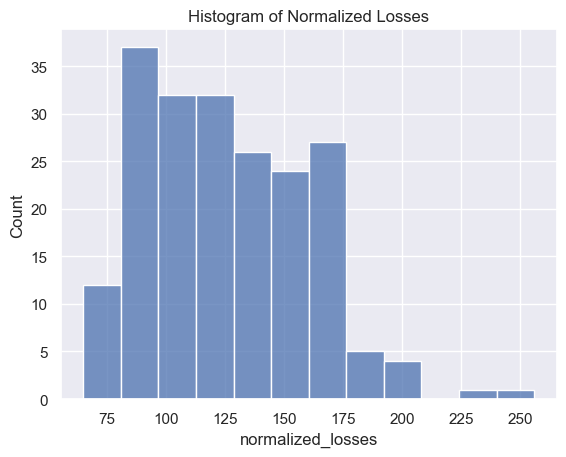

C:\Users\Toto\AppData\Local\Temp\ipykernel_2080\4067833308.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(auto['normalized_losses'], kde=False, rug=True)


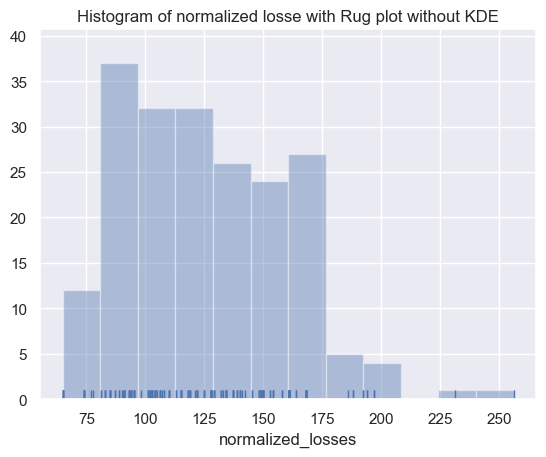

In [84]:
#Histogram of normalized losses
sns.histplot(auto['normalized_losses'])
plt.title("Histogram of Normalized Losses")
plt.show()

#normalized losse with Rug plot without KDE
sns.distplot(auto['normalized_losses'], kde=False, rug=True)
plt.title("Histogram of normalized losse with Rug plot without KDE")
plt.show()

**Observation**
Most cars have normalized losses around the mid-range. The rug plot shows individual data points, revealing a few extreme values (outliers) on both ends.

## 2.Bivariate Analysis
We examine relationships between two continuous varibales, to understand the pattern or underlying structure. Such as engine size and horsepower.

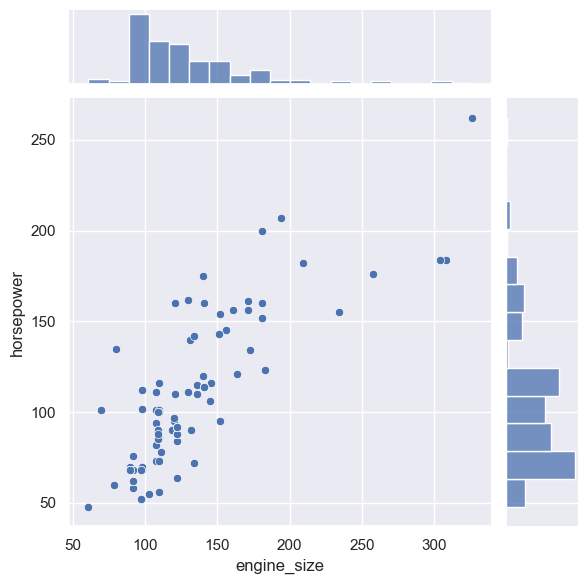

In [86]:
# Scatter + Histogram
sns.jointplot(x=auto['engine_size'], y=auto['horsepower'])
plt.show()

**Observation**
-Engine size and horsepower show a positive correlation.
-Most cars cluster at smaller engine sizes and lower horsepower.
-A few outliers exist.

## 3.Multivariate Analysis
Between multiple continuous variables how do we create a single visual that's going to explain everything for us accordingly.

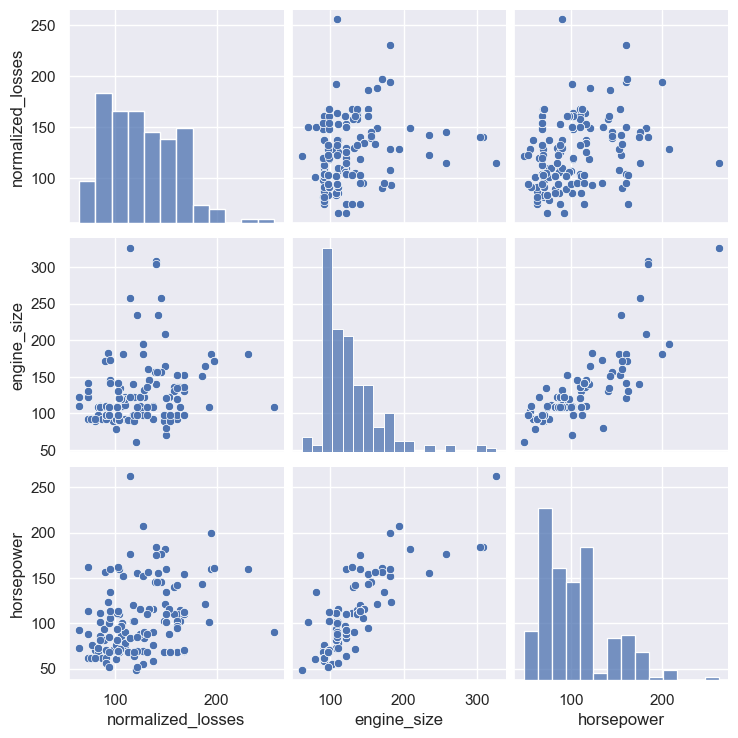

In [87]:
sns.pairplot(auto[['normalized_losses', 'engine_size', 'horsepower']])

## 4.Categorical and Continuous Analysis
We explore how categorical variables relate to horsepower. This helps us understand how fuel type, number of doors, body style, and fuel system affect car performance.

### Fuel type vs Horsepower

<Axes: xlabel='fuel_type', ylabel='horsepower'>

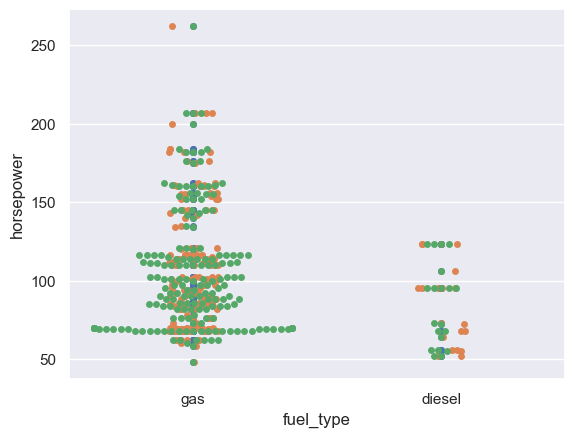

In [89]:
# Strip plot without jitter
sns.stripplot(x=auto['fuel_type'], y=auto['horsepower'], jitter=False)

# Strip plot with jitter
sns.stripplot(x=auto['fuel_type'], y=auto['horsepower'])

#Swarm plot (avoids overlapping points)
sns.swarmplot(x=auto['fuel_type'], y=auto['horsepower'])

**Observation**
- Most cars have lower horsepower
- Gas vehicles are much more common than diesel vehicles, showing high imbalance in fuel type distribution.
- Swarm plots give a clearer picture because points do not overlap, unlike basic strip plots

### Number of Doors VS Horsepower

<Axes: xlabel='number_of_doors', ylabel='horsepower'>

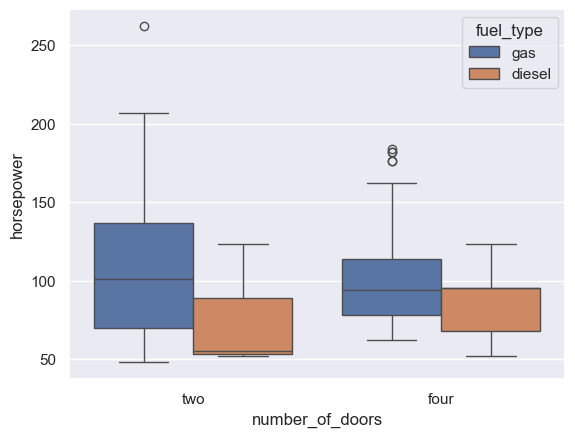

In [90]:
# Box plot zith fuel type hue
sns.boxplot(x=auto['number_of_doors'], y=auto['horsepower'], hue=auto['fuel_type'])

**Obsevation**
- The boxplot shows the quartiles of horsepower for each number of doors and fuel type.
- Most cars have lower horsepower.

### Body Style vs Horsepower

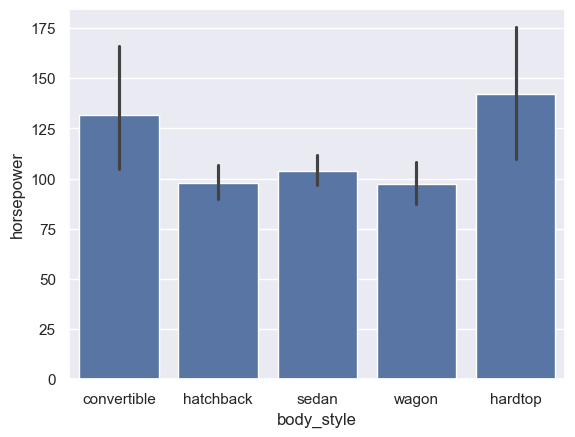

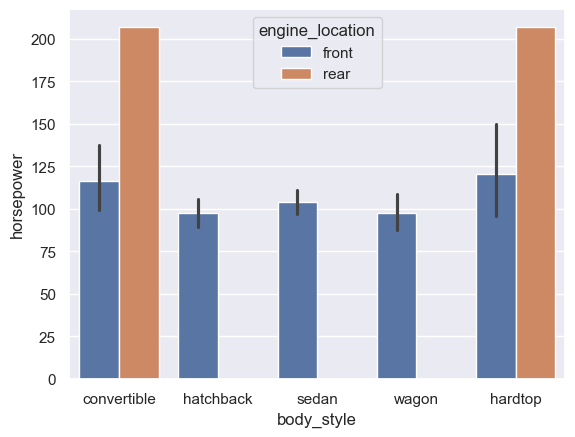

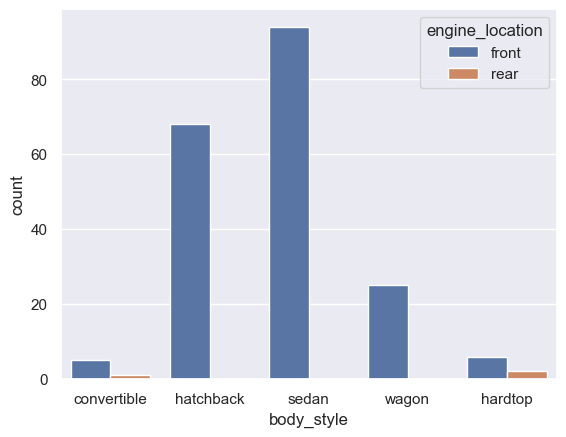

In [92]:
# Simple bar plot
sns.barplot(x=auto['body_style'], y=auto['horsepower'])
plt.show()

# Bar plot with engine location hue
sns.barplot(x=auto['body_style'], y=auto['horsepower'], hue=auto['engine_location'])
plt.show()


# Count plot
sns.countplot(x=auto['body_style'], hue=auto['engine_location'])
plt.show()


**Observation**
- Average horsepower varies across body styles.
- Engine location also affects horsepower, as shown in the hue-seperated bar plots.
- Count plots shows the number of cars in each category, revealing distribution imbalances.

### Fuel System vs Horsepower

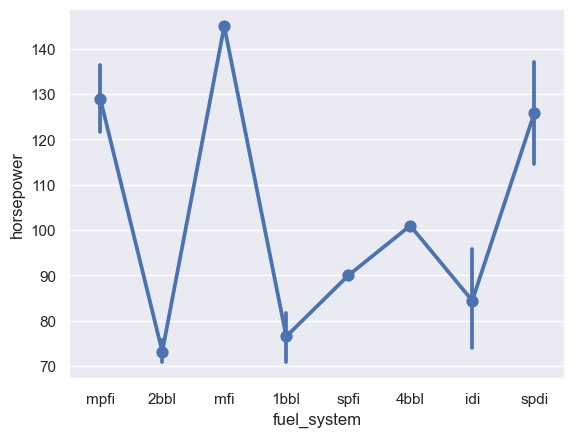

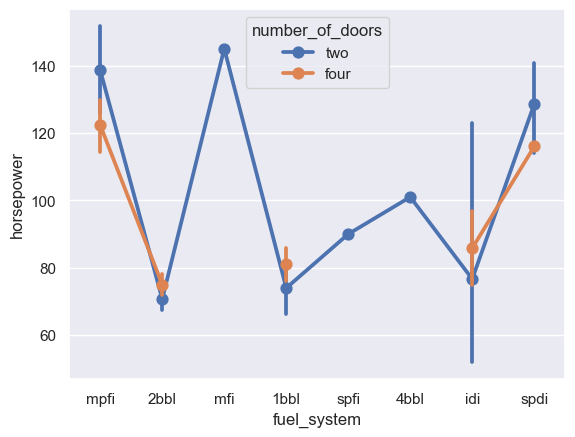

In [93]:
# Point plots
sns.pointplot(x=auto['fuel_system'], y=auto['horsepower'])
plt.show()

sns.pointplot(x=auto['fuel_system'], y=auto['horsepower'], hue=auto['number_of_doors'])
plt.show()

**Observation**
- Fuel system affects average horsepower

## 5.Multi-pannel categorial plot
multiple categorial variables using array of information

C:\Users\Toto\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Toto\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


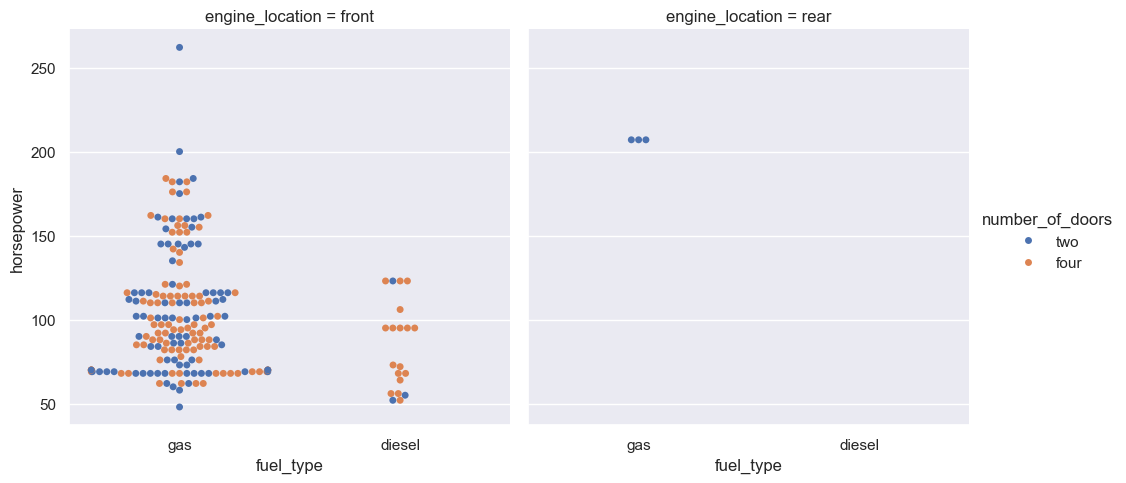

In [95]:
sns.catplot(x="fuel_type",
              y ="horsepower",
              hue="number_of_doors",
              col="engine_location",
              data=auto,
              kind="swarm")

**Observation**
- Fuel type, number of doors, and engine location jointly influence horsepower.
- Cars with fewer doors generally have lower horsepower.
- Gas cars dominate across.

# Linear Regression plot 
LM plot
its a quick plot interms of identifying the linear trend between two variables, instead of going through the hasel of creating a simple linear regression.
see how the linear regression is between the two variables and whether a prediction or a machine learning algorithm can be formed using these two variables as a base.

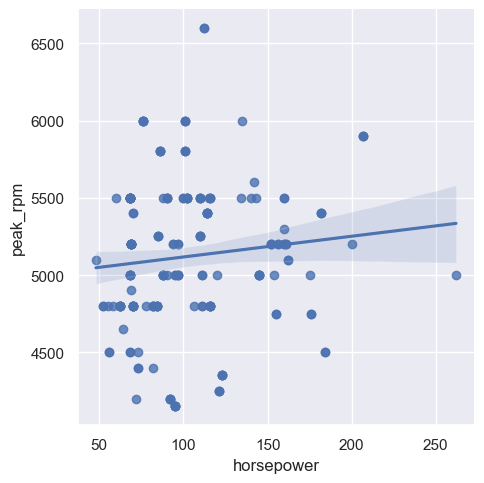

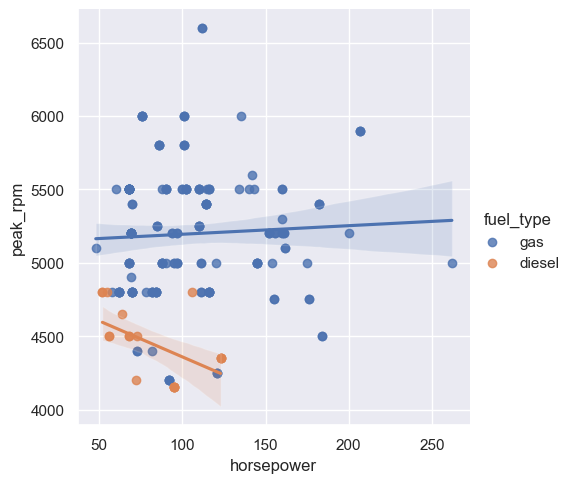

In [97]:
# Linear trend: Horsepower vs Peak RPM
sns.lmplot(x="horsepower", y="peak_rpm", data=auto)
plt.show()

# Linear trend: Horsepower vs Peak RPM
sns.lmplot(x="horsepower", y="peak_rpm", data=auto, hue="fuel_type")
plt.show()

# Conclusion

- Engine size strongly correlates with horsepower.
- Gas vehicle are more frequent than diesel; low horsepower cars dominate the dataset.
- Body style and engine location influence average horsepower.
- Visualisation help identify outliers, patterns, and categorical difference.